### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
    $$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$.

---

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
    $$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
    $$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.

--- Parte 1: Sistema Base ---
FT de la Planta (Gp):
<TransferFunction>: sys[12]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

FT en Lazo Cerrado (Sistema Base):
<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos del sistema base:
[-3.+1.j -3.-1.j]


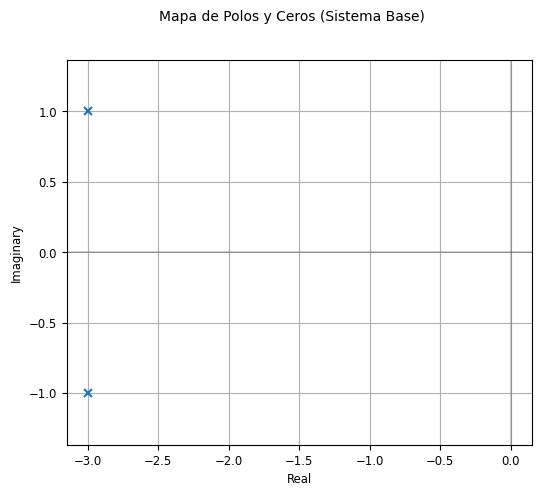

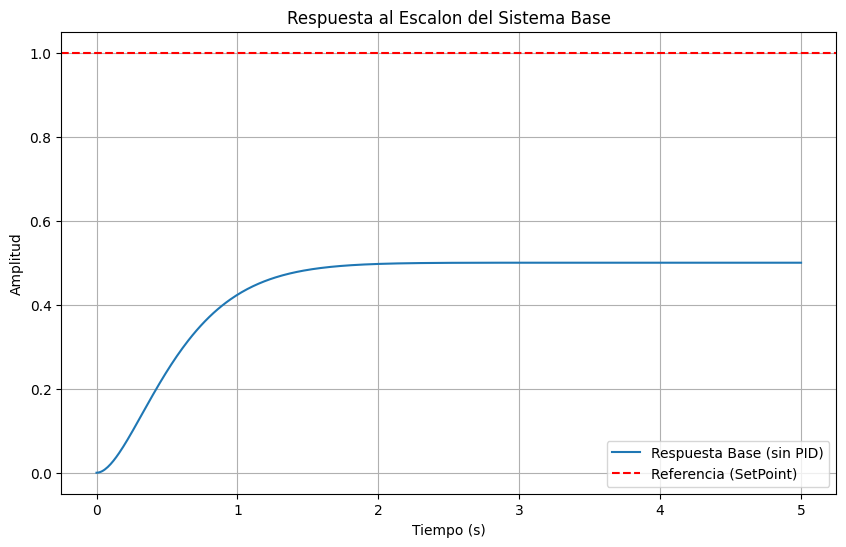


Metricas de desempeño del Sistema Base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (ess): 0.5000


In [3]:
# Parte 1: Analisis del sistema base

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# 1. Definir la FT 
num_p = [5]
den_p = [1, 6, 5] 
Gp = ct.tf(num_p, den_p)
print("--- Parte 1: Sistema Base ---")
print("FT de la Planta (Gp):")
print(Gp)

# 2. Obtener la FT de lazo cerrado G_LC(s) = Gp(s) / (1 + Gp(s))
sistema_base = ct.feedback(Gp, 1)

# 3. Imprimir G_LC(s) y sus polos
print("\nFT en Lazo Cerrado (Sistema Base):")
print(sistema_base)
polos_base = ct.poles(sistema_base)
print("\nPolos del sistema base:")
print(polos_base)

# 4. Mapa de polos y ceros
plt.figure(figsize=(6, 5))
ct.pzmap(sistema_base, title='Mapa de Polos y Ceros (Sistema Base)')
plt.grid(True)
plt.show()

# 5. Graficar la respuesta al escalon unitario (5 seg)
T = np.linspace(0, 5, 501)
t_base, y_base = ct.step_response(sistema_base, T=T)

plt.figure(figsize=(10, 6))
plt.plot(t_base, y_base, label="Respuesta Base (sin PID)")
plt.axhline(y=1, color="r", linestyle="--", label="Referencia (SetPoint)")
plt.title("Respuesta al Escalon del Sistema Base")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# 6. Imprimir las metricas de desempeño
print("\nMetricas de desempeño del Sistema Base:")
info_base = ct.step_info(sistema_base)

print(f"  - Sobreimpulso (Overshoot): {info_base.get('Overshoot', 0):.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info_base.get('SettlingTime', 0):.2f} s")

# Calcular el error en estado estacionario
valor_final_base = y_base[-1]
error_ss_base = 1 - valor_final_base 
print(f"  - Valor final: {valor_final_base:.4f}")
print(f"  - Error en estado estacionario (ess): {error_ss_base:.4f}")

#### Parte 2: Proceso de diseño del PID

Observando las metricas del sistema base (Error $e_{ss}=0.5$, Sobreimpulso=0%, Tiempo de establecimiento $\approx 1.67$ s), el objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con: $e_{ss}=0$, Sobreimpulso < 5%, y Tiempo de establecimiento < 1.0 s.

**Hipotesis**

1.  **Eliminar Error ($e_{ss}$):** El sistema base tiene un error significativo ($e_{ss}=0.5$). Para eliminarlo, necesitamo incluir la **parte integral ($K_i > 0$)** en el controlador. Esto  asegura que la salida eventualmente alcance la referencia.

2.  **Reducir Tiempo de Establecimiento ($T_s$):** El sistema base es lento  en cuanto lo esperado ($T_s \approx 1.67$ s) y el objetivo es hacerlo mas rapido ($T_s < 1.0$ s). La **parte proporcional ($K_p$)** es la nos ayudara a aumentar la velocidad de respuesta. Por lo que se iniciara incrementando $K_p$.

3.  **Controlar Sobreimpulso (Overshoot):** Aumentar $K_p$ generalmente incrementa el sobreimpulso. Dado que necesitamos mantenerlo bajo (< 5%), se necesitara la **parte derivativa ($K_d$)** para amortiguar la respuesta, contrarrestando el efecto de $K_p$ y $K_i$ sobre las oscilaciones.

**Estrategia:**  
    -Comenzar con un valor de $K_p$ para acelerar la respuesta, buscando un tiempo de establecimiento cercano a 1.0 s.  
    -Introducir $K_d$ para reducir el sobreimpulso por debajo del 5%, reajustando $K_p$.  
    -Finalmente, añadir una ganancia integral $K_i$ pequeña para eliminar el error en estado estacionario, verificando que no afecte significativamente el sobreimpulso o el tiempo de establecimiento. Realizar ajustes finos en las tres ganancias ($K_p, K_i, K_d$) hasta cumplir los criterios.


--- Parte 3: Sistema Controlado con PID ---
Controlador PID (Gc):
<TransferFunction>: sys[116]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  6 s^2 + 40 s + 10
  -----------------
          s

Función de Transferencia en Lazo Cerrado con PID:
<TransferFunction>: sys[119]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     30 s^2 + 200 s + 50
  -------------------------
  s^3 + 36 s^2 + 205 s + 50

Polos del sistema controlado con PID:
[-28.98748753+0.j  -6.75724849+0.j  -0.25526398+0.j]


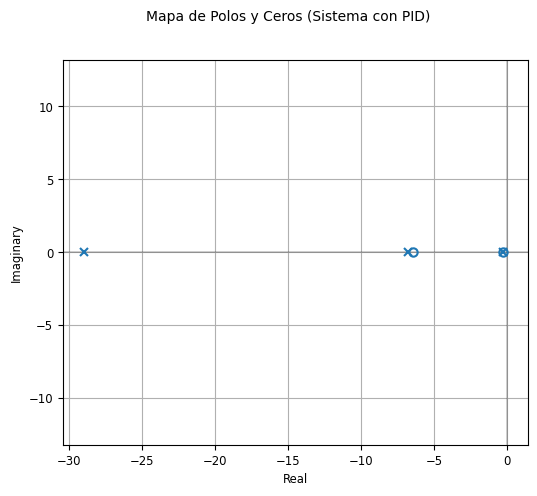

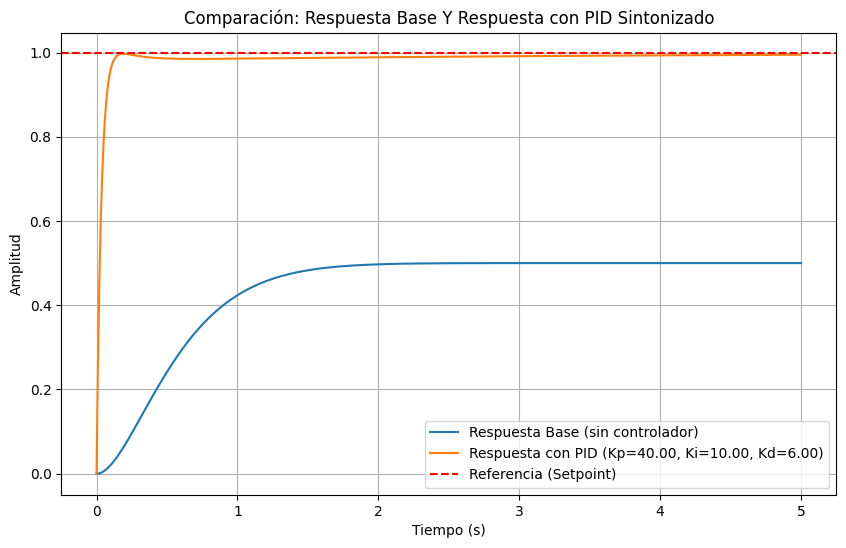


Metricas de desempeño del Sistema con PID:
  - Sobreimpulso (Overshoot): 0.00%  (Objetivo: < 5%)
  - Tiempo de establecimiento (SettlingTime): 0.12 s (Objetivo: < 1.0 s)
  - Valor final: 0.9947
  - Error en estado estacionario (ess): 0.0053 (Objetivo: 0)


In [18]:
# Parte 3: Implementación del controlador PID sintonizado

# 1. Definir las ganancias Kp, Ki y Kd
Kp = 40  # Ganancia Proporcional
Ki = 10  # Ganancia Integral
Kd = 6  # Ganancia Derivativa

# 2. Crear la FT del controlador PID
num_pid = [Kd, Kp, Ki]
den_pid = [1, 0] 
Gc = ct.tf(num_pid, den_pid)
print("--- Parte 3: Sistema Controlado con PID ---")
print("Controlador PID (Gc):")
print(Gc)

# 3. Calcular la nueva FT de lazo cerrado con el controlador
sistema_pid = ct.feedback(Gc * Gp, 1)

# 4. Imprimir sus nuevos polos
print("\nFunción de Transferencia en Lazo Cerrado con PID:")
print(sistema_pid)
polos_pid = ct.poles(sistema_pid)
print("\nPolos del sistema controlado con PID:")
print(polos_pid)

# 5. Mapa de polos y ceros del sistema controlado
plt.figure(figsize=(6, 5))
ct.pzmap(sistema_pid, title='Mapa de Polos y Ceros (Sistema con PID)')
plt.grid(True)
plt.show()

# 6. Graficar respuesta base Y respuesta con PID (5 seg)
T = np.linspace(0, 5, 501)
t_pid, y_pid = ct.step_response(sistema_pid, T=T)

plt.figure(figsize=(10, 6))
plt.plot(t_base, y_base, label="Respuesta Base (sin controlador)") 
plt.plot(t_pid, y_pid, label=f"Respuesta con PID (Kp={Kp:.2f}, Ki={Ki:.2f}, Kd={Kd:.2f})")
plt.axhline(y=1, color="r", linestyle="--", label="Referencia (Setpoint)")
plt.title("Comparación: Respuesta Base Y Respuesta con PID Sintonizado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# 7. Imprimir las metricas de desempeño finales
print("\nMetricas de desempeño del Sistema con PID:")
info_pid = ct.step_info(sistema_pid)

print(f"  - Sobreimpulso (Overshoot): {info_pid.get('Overshoot', 0):.2f}%  (Objetivo: < 5%)")
print(f"  - Tiempo de establecimiento (SettlingTime): {info_pid.get('SettlingTime', 0):.2f} s (Objetivo: < 1.0 s)")

# Calcular el error en estado estacionario
valor_final_pid = y_pid[-1]
error_ss_pid = 1 - valor_final_pid
print(f"  - Valor final: {valor_final_pid:.4f}")
print(f"  - Error en estado estacionario (ess): {error_ss_pid:.4f} (Objetivo: 0)")